# Health Admission

### Proyek Akhir KASDD (Code Individu)

Nama: Muhammad Hilal Darul Fauzan <br>
NPM: 2206830542 <br>
Kelas: B
Kelompok: Ok Gas

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import polyfit

In [320]:
df = pd.read_csv("admission.csv")
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,OUTCOME,HB
0,3615,344173,10/9/2017,10/15/2017,63,F,U,O,Oct-17,7,...,0,0,0,0,0,0,0,0,DISCHARGE,10.9
1,14308,665288,04/02/2019,08/02/2019,47,M,U,O,Feb-19,5,...,0,0,0,0,0,0,0,0,DISCHARGE,15
2,3303,203598,25/09/2017,26/09/2017,59,M,U,E,Sep-17,2,...,0,0,0,0,0,0,0,0,DISCHARGE,13.7
3,15405,640386,17/03/2019,25/03/2019,62,M,R,E,Mar-19,9,...,0,0,0,0,0,0,0,0,DISCHARGE,13.3
4,2232,168189,7/28/2017,8/1/2017,55,F,U,E,Jul-17,5,...,0,0,0,0,0,0,0,0,DISCHARGE,11.8


In [321]:
df.columns

Index(['SNO', 'MRD No.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE OF ADMISSION-EMERGENCY/OPD', 'month year', 'DURATION OF STAY',
       'duration of intensive unit stay', 'SMOKING ', 'ALCOHOL', 'DM', 'HTN',
       'CAD', 'PRIOR CMP', 'CKD', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA',
       'CREATININE', 'BNP', 'RAISED CARDIAC ENZYMES', 'EF', 'SEVERE ANAEMIA',
       'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI', 'ATYPICAL CHEST PAIN',
       'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR', 'CHB', 'SSS', 'AKI',
       'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'CONGENITAL', 'UTI',
       'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS',
       'DVT', 'CARDIOGENIC SHOCK', 'SHOCK', 'PULMONARY EMBOLISM',
       'CHEST INFECTION', 'OUTCOME', 'HB'],
      dtype='object')

Berikut ini adalah deskripsi setiap kolom pada dataset.
- SNO : Serial Number (unique)
- MRD No. : Admission Number
- D.O.A  : Date of Admission
- D.O.D   : Date of Discharge
- AGE     : Age patient
- GENDER  : Gender patient (F (Female)/M (Male)
- RURAL   : Household are of patient ( U (Urban)/ R (Rural))
- TYPE OF ADMISSION-EMERGENCY/OPD  : O (Outpatient)/E (Emergency)
- month year   : Month and year of admission
- DURATION OF STAY   : How long the patient stay in hospital
- duration of intensive unit stay  : How long the patient do intensive stay in hospital
- SMOKING : Is patient smoke? (1 (True)/ 0(False))
- ALCOHOL  : Is patient drink alcohol? (1 (True)/ 0(False))
- DM   : Diabetes Mellitus
- HTN : Hypertension
- CAD : Coronary Artery Disease
- PRIOR CMP : CARDIOMYOPATHY
- CKD  : CHRONIC KIDNEY DISEASE
- TLC  : TOTAL LEUKOCYTES COUNT
- PLATELETS : Platelets on patient
- GLUCOSE : Glucose on patient
- UREA  
- CREATININE  : Creatinine on patient
- BNP   : B-TYPE NATRIURETIC PEPTIDE
- RAISED CARDIAC ENZYMES 
- EF    : Ejection Fraction
- SEVERE ANAEMIA 
- ANAEMIA   
- STABLE ANGINA  
- ACS   : Acute coronary Syndrome
- STEMI  : ST ELEVATION MYOCARDIAL INFARCTION
- ATYPICAL CHEST PAIN  
- HEART FAILURE    
- HFREF  : HEART FAILURE WITH REDUCED EJECTION FRACTION
- HFNEF  : HEART FAILURE WITH NORMAL EJECTION FRACTION
- VALVULAR  : Valvular Heart Disease
- CHB  : Complete Heart Block
- SSS  : Sick sinus syndrome
- AKI  : ACUTE KIDNEY INJURY
- CVA INFRACT  : Cerebrovascular Accident INFRACT
- CVA BLEED  : Cerebrovascular Accident BLEED
- AF  : Atrial Fibrilation
- VT  : Ventricular Tachycardia
- PSVT : PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA
- CONGENITAL : Congenital Heart Disease
- UTI  : Urinary tract infection
- NEURO CARDIOGENIC SYNCOPE
- ORTHOSTATIC 
- INFECTIVE ENDOCARDITIS
- DVT  : Deep venous thrombosis
- CARDIOGENIC SHOCK
- SHOCK  
- PULMONARY EMBOLISM   
- CHEST INFECTION  
- OUTCOME  : outcome the patient (Discharge / DAMA (Discharged Against Medical Advice)/ Expiry)
- HB : Hemoglobin

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              12551 non-null  int64 
 1   MRD No.                          12551 non-null  object
 2   D.O.A                            12551 non-null  object
 3   D.O.D                            12551 non-null  object
 4   AGE                              12551 non-null  int64 
 5   GENDER                           12551 non-null  object
 6   RURAL                            12551 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  object
 8   month year                       12551 non-null  object
 9   DURATION OF STAY                 12551 non-null  int64 
 10  duration of intensive unit stay  12551 non-null  int64 
 11  SMOKING                          12551 non-null  int64 
 12  ALCOHOL                         

## Eksplorasi

In [323]:
df_copy = df.copy(deep=True)

#### 1. Pada bulan apakah jumlah pasien terbanyak yang dirawat di rumah sakit?

In [324]:
df_copy['month-year'] = pd.to_datetime(df_copy['month year'], format='%b-%y')

monthly_admissions = df_copy.groupby('month-year').size().sort_index()

max_admission_month = monthly_admissions.idxmax()
max_admission_count = monthly_admissions.max()

max_admission_month, max_admission_count

(Timestamp('2019-01-01 00:00:00'), 688)

Jumlah pasien terbanyak yang dirawat di rumah sakit pada Januari 2019.

#### 2. Bagaimana karakteristik pasien yang menderita heart failure?

In [325]:
heart_failure_data = df_copy[df_copy['HEART FAILURE'] == 1]
selected_columns = ['AGE', 'GENDER', 'RURAL', 'HB', 'DURATION OF STAY']
heart_failure_characteristics = heart_failure_data[selected_columns]
heart_failure_stats = heart_failure_characteristics.describe(include='all')

heart_failure_stats

,AGE,GENDER,RURAL,HB,DURATION OF STAY
count,3665.000000,3665,3665,3665,3665.000000
unique,NaN,2,2,140,NaN
top,NaN,M,U,11.4,NaN
freq,NaN,2215,2822,78,NaN
mean,64.639291,NaN,NaN,NaN,7.766985
std,12.508634,NaN,NaN,NaN,5.543078
min,14.000000,NaN,NaN,NaN,1.000000
25%,57.000000,NaN,NaN,NaN,4.000000
50%,65.000000,NaN,NaN,NaN,7.000000
75%,73.000000,NaN,NaN,NaN,10.000000


#### 3. Penyakit apa yang terbanyak diderita pasien yang berumur 19 - 25 tahun?

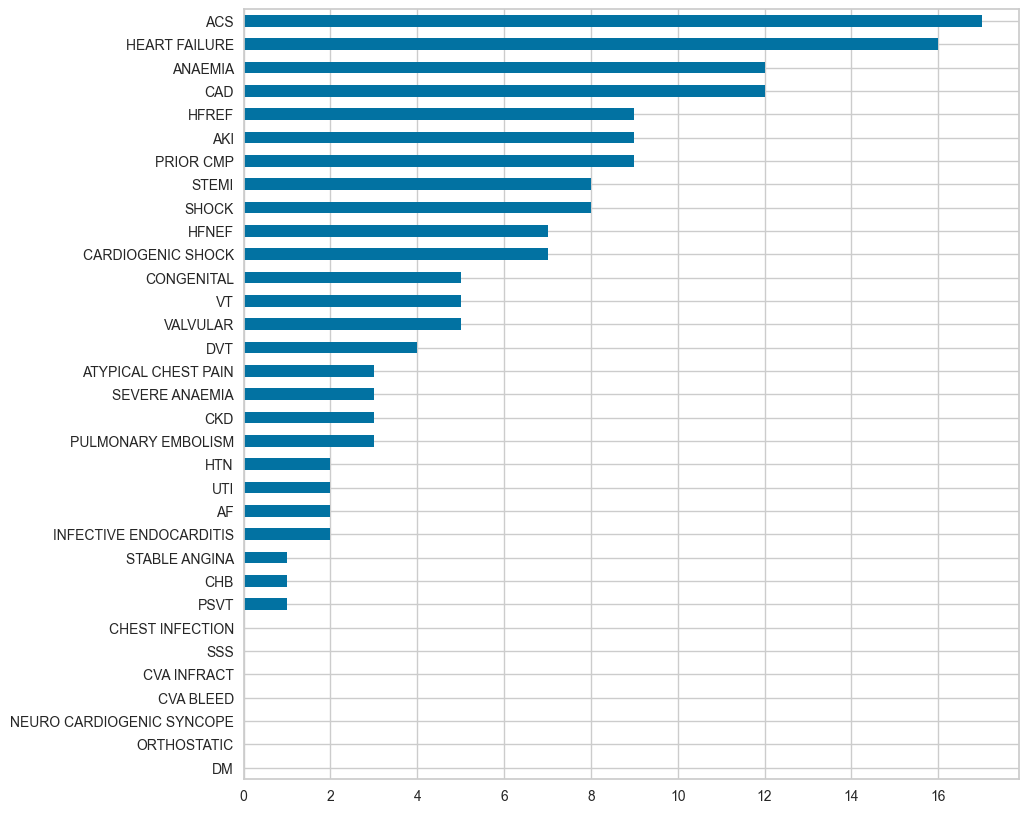

In [326]:
age_filtered_data = df_copy[(df_copy['AGE'] >= 19) & (df_copy['AGE'] <= 25)].copy()

# Kolom-kolom penyakit
start_index = df_copy.columns.get_loc('DM')
end_index = df_copy.columns.get_loc('CKD') + 1
disease_columns = df_copy.columns[start_index:end_index].tolist()

start_index = df_copy.columns.get_loc('SEVERE ANAEMIA')
end_index = df_copy.columns.get_loc('CHEST INFECTION') + 1
disease_columns += df_copy.columns[start_index:end_index].tolist()

age_filtered_data.loc[:, 'CHEST INFECTION'] = pd.to_numeric(age_filtered_data['CHEST INFECTION'], errors='coerce')
column_sums = age_filtered_data[disease_columns].sum().sort_values()

plt.figure(figsize=(10, 10))
column_sums.plot(kind='barh')
plt.show()

#### 4. Apakah pasien yang memiliki kebiasan merokok dan tinggal di daerah urban memiliki rata-rata komplikasi penyakit yang lebih banyak dibandingkan pasien yang memiliki kebiasan merokok dan tinggal di daerah rural? (komplikasi penyakit dapat diketahui dari jumlah penyakit yang diderita suatu pasien) 

In [327]:
# Filter data untuk perokok perkotaan dan pedesaan
urban_smoke = df_copy[(df_copy['SMOKING '] == 1) & (df_copy['RURAL'] == "U")].copy()
rural_smoke = df_copy[(df_copy['SMOKING '] == 1) & (df_copy['RURAL'] == "R")].copy()

# Kolom-kolom penyakit
start_index = df_copy.columns.get_loc('DM')
end_index = df_copy.columns.get_loc('CKD') + 1
disease_columns = df_copy.columns[start_index:end_index].tolist()

start_index = df_copy.columns.get_loc('SEVERE ANAEMIA')
end_index = df_copy.columns.get_loc('CHEST INFECTION') + 1
disease_columns += df_copy.columns[start_index:end_index].tolist()

# Mengonversi 'CHEST INFECTION' ke numerik
urban_smoke['CHEST INFECTION'] = pd.to_numeric(urban_smoke['CHEST INFECTION'], errors='coerce')
rural_smoke['CHEST INFECTION'] = pd.to_numeric(rural_smoke['CHEST INFECTION'], errors='coerce')

# Menghitung jumlah penyakit untuk setiap baris
urban_smoke['disease_sum'] = urban_smoke[disease_columns].sum(axis=1)
rural_smoke['disease_sum'] = rural_smoke[disease_columns].sum(axis=1)

# Menghitung rata-rata jumlah penyakit untuk perokok perkotaan dan pedesaan
urban_mean = urban_smoke['disease_sum'].mean()
rural_mean = rural_smoke['disease_sum'].mean()

urban_mean, rural_mean

(3.4763779527559056, 3.4390243902439024)

## Data Cleaning

### Cek Missing Values

In [328]:
df.shape

(12551, 56)

In [329]:
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

In [330]:
cek_null(df)

            Total    Percent
UREA           25   0.199187
PLATELETS      29   0.231057
TLC            30   0.239025
CREATININE     31   0.246992
GLUCOSE       580   4.621146
EF           1194   9.513186
BNP          6615  52.704964


Missing values pada kolom BNP terlalu banyak, saya memutuskan untuk melakukan drop kolom tersebut. Untuk kolom sisanya yang masih terdapat missing values akan dihandle ketika data preprocessing.

In [331]:
df.drop('BNP', axis=1)

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,OUTCOME,HB
0,3615,344173,10/9/2017,10/15/2017,63,F,U,O,Oct-17,7,...,0,0,0,0,0,0,0,0,DISCHARGE,10.9
1,14308,665288,04/02/2019,08/02/2019,47,M,U,O,Feb-19,5,...,0,0,0,0,0,0,0,0,DISCHARGE,15
2,3303,203598,25/09/2017,26/09/2017,59,M,U,E,Sep-17,2,...,0,0,0,0,0,0,0,0,DISCHARGE,13.7
3,15405,640386,17/03/2019,25/03/2019,62,M,R,E,Mar-19,9,...,0,0,0,0,0,0,0,0,DISCHARGE,13.3
4,2232,168189,7/28/2017,8/1/2017,55,F,U,E,Jul-17,5,...,0,0,0,0,0,0,0,0,DISCHARGE,11.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12546,5032,377273,12/8/2017,12/11/2017,65,F,U,O,Dec-17,4,...,0,0,0,0,0,0,0,0,DISCHARGE,11.9
12547,7031,451050,03/03/2018,14/03/2018,55,F,U,E,Mar-18,12,...,0,0,0,1,0,1,0,0,DISCHARGE,20.9
12548,5795,353502,1/6/2018,1/17/2018,86,M,U,E,Jan-18,12,...,0,0,0,0,1,1,0,0,EXPIRY,9.3
12549,1373,286711,6/14/2017,6/15/2017,46,M,U,O,Jun-17,2,...,0,0,0,0,0,0,0,0,DISCHARGE,16.3


### Cek Duplications

In [332]:
df.duplicated().any()

False

Tidak ada entry duplikat pada dataset.

### Cek Outliers

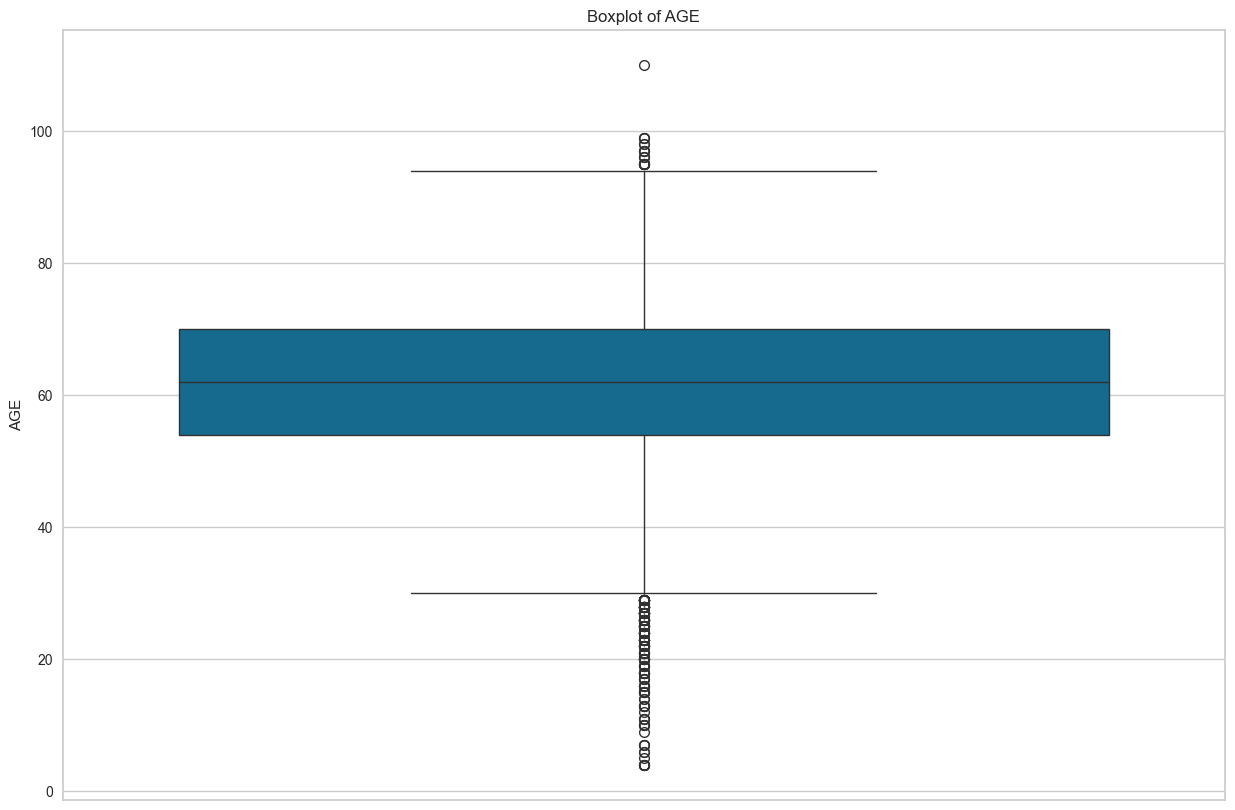

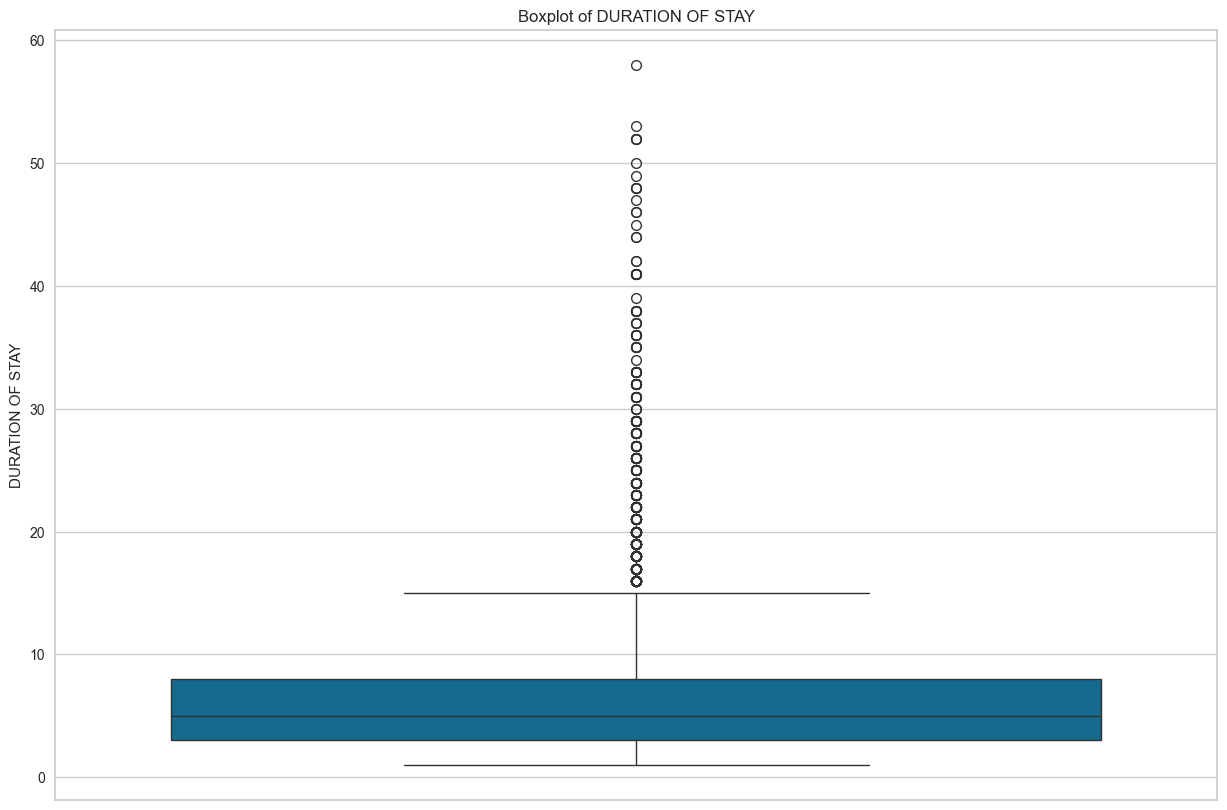

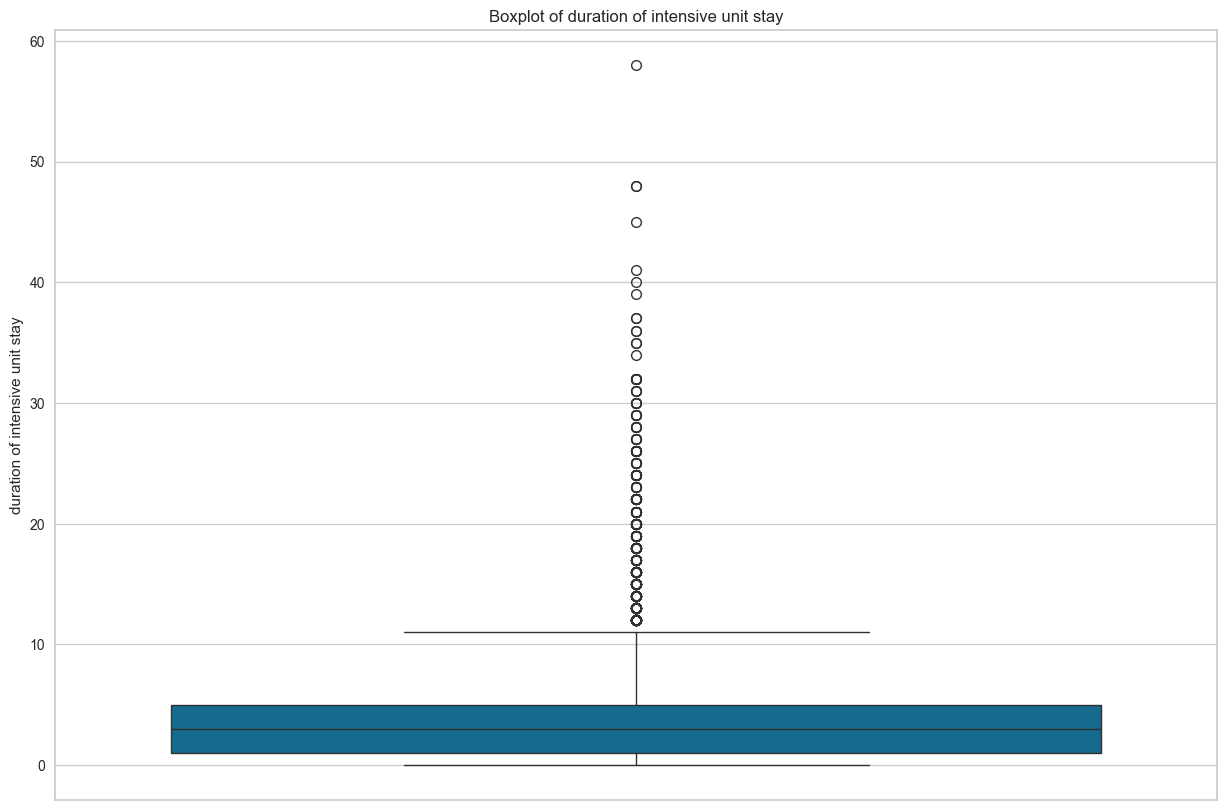

In [333]:
df_numeric = df.select_dtypes(exclude=['object'])

binary_columns = [col for col in df_numeric.columns if df_numeric[col].dropna().isin([0, 1]).all()]
df_non_binary = df_numeric.drop(columns=binary_columns + ['SNO'])

# Tampilkan boxplot untuk kolom numerik yang tidak memiliki binary value
for column in df_non_binary.columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df_non_binary, y=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [334]:
def check_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df < lower_limit) | (df > upper_limit)
    print ("Outlier pada tiap atribut:")
    print(outliers.sum())

    return outliers

In [335]:
outliers = dict(check_outlier(df_numeric).sum())

Outlier pada tiap atribut:
SNO                                   0
AGE                                 267
DURATION OF STAY                    585
duration of intensive unit stay     542
SMOKING                             631
ALCOHOL                             836
DM                                    0
HTN                                   0
CAD                                   0
PRIOR CMP                          1968
CKD                                1239
RAISED CARDIAC ENZYMES             2506
SEVERE ANAEMIA                      245
ANAEMIA                            2238
STABLE ANGINA                      1048
ACS                                   0
STEMI                              1775
ATYPICAL CHEST PAIN                 333
HEART FAILURE                         0
HFREF                              1964
HFNEF                              1711
VALVULAR                            439
CHB                                 314
SSS                                  85
AKI          

Hipotesis: <br>
Menurut saya, nilai-nilai outliers dari kolom-kolom di atas mungkin saja terjadi di dunia nyata. Mengingat pentingnya tidak kehilangan informasi dalam konteks medis, saya memilih untuk biarkan saja outlier ini karena tidak ingin kehilangan potensi informasi penting tentang pasien dengan nilai ekstrem yang mungkin menyebabkan durasi pasien dirawat secara intensif cukup lama.

## Data Preprocessing

In [336]:
# Drop Serial Number dan Admission Number karena tidak berisi informasi apapun
# Drop D.O.A dan D.O.D karena sudah direpresentasikan melalui kolom lain
df.drop(columns=['SNO', 'MRD No.', 'D.O.A', 'D.O.D'], inplace=True)

In [337]:
df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
df['RURAL'] = df['RURAL'].map({'R': 1, 'U': 0})
df['TYPE OF ADMISSION-EMERGENCY/OPD'] = df['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 1, 'O': 0})

In [338]:
columns_to_convert = ['TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'EF', 'CHEST INFECTION', 'HB']
df['CHEST INFECTION'].replace({'\\': pd.NA}, inplace=True)

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

C:\Users\680543\AppData\Local\Temp\ipykernel_4600\2089152262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CHEST INFECTION'].replace({'\\': pd.NA}, inplace=True)


In [339]:
df[['month', 'year']] = df['month year'].str.split('-', expand=True)

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df['year'] = df['year'].astype(int)
df['month'] = df['month'].map(month_mapping)

df.drop(['month year'], axis=1, inplace=True)

In [340]:
outcome_mapping = {
    'DAMA': 0,
    'DISCHARGE': 1,
    'EXPIRY': 2
}

df['OUTCOME'] = df['OUTCOME'].map(outcome_mapping)

In [341]:
# Lakukan imputasi untuk mengisi missing values
df = df.fillna(df.median())

## Modeling

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, r2_score
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV

### Klasifikasi

In [343]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score


def evaluate_classifier_performance(prediction, y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print("Another Metrics : ")
    print('Accuracy Average:', accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [344]:
X_classif = df.drop('OUTCOME', axis=1)
y_classif = df['OUTCOME']

# 80% data train dan 20% data test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_classif, y_classif, test_size=0.2, random_state=42)

In [372]:
def hyperparameter_tuning(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, scoring='f1')
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

In [375]:
# XGBoost
from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

best_xgb = hyperparameter_tuning(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, X_train_c, y_train_c)
y_pred_xgb = best_xgb.predict(X_test_c)

print("XGBoost Performance:")
print(classification_report(y_test_c, y_pred_xgb, zero_division=0))
f1_xgb = f1_score(y_test_c, y_pred_xgb, average='micro')
print(f"XGBoost F1 Score: {f1_xgb}")

c:\Users\680543\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for XGBClassifier: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Performance:
              precision    recall  f1-score   support

           0       0.68      0.17      0.27       157
           1       0.93      0.99      0.96      2203
           2       0.84      0.64      0.73       151

    accuracy                           0.92      2511
   macro avg       0.82      0.60      0.65      2511
weighted avg       0.91      0.92      0.90      2511

XGBoost F1 Score: 0.9195539625647152


In [376]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

best_rf = hyperparameter_tuning(RandomForestClassifier(), rf_params, X_train_c, y_train_c)
y_pred_rf = best_rf.predict(X_test_c)

print("Random Forest Performance:")
print(classification_report(y_test_c, y_pred_rf, zero_division=0))
f1_rf = f1_score(y_test_c, y_pred_rf, average='micro')
print(f"Random Forest F1 Score: {f1_rf}")

c:\Users\680543\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.88      0.04      0.08       157
           1       0.91      1.00      0.95      2203
           2       0.92      0.55      0.69       151

    accuracy                           0.91      2511
   macro avg       0.90      0.53      0.58      2511
weighted avg       0.91      0.91      0.88      2511

Random Forest F1 Score: 0.9119872560732776


Dapat terlihat bahwa F1 score yang dihasilkan keduanya hampir mirip. Akan tetapi, score dari model XGBoost lebih tinggi dibandingkan Random Forest.

### Regresi

In [350]:
def regression_metrics(prediction, y_test):
    R_squared = r2_score(y_test, prediction)
    print('R_squared: ' + str(R_squared))

In [351]:
X_regression = df.drop(columns=['duration of intensive unit stay'])
y_regression = df['duration of intensive unit stay']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

In [352]:
models_r = {
    'linear_regression': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'catboost': CatBoostRegressor(verbose=0)
}

#### Cross Validation

In [353]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in models_r.keys():
  models_r[model].fit(X_train_r, y_train_r)
  result = cross_val_score(models_r[model], X_train_r, y_train_r, cv=kf, scoring='r2')
  print(f'{model}: {result.mean()}')

linear_regression: 0.686158100454164
ridge: 0.6862077101687343
lasso: 0.6512758957318442
catboost: 0.6935169082351653


In [354]:
# Perform model training and evaluation
for model in models_r.keys():
    predicted = models_r[model].predict(X_test_r)
    print(f'{model}')
    regression_metrics(predicted, y_test_r)
    print("")

linear_regression
R_squared: 0.6221887310296947

ridge
R_squared: 0.622308213565625

lasso
R_squared: 0.5961610085689846

catboost
R_squared: 0.6397548105252195



#### Hyperparameter Tuning

In [355]:
param_grid = {
    'linear_regression': {},
    'ridge': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'lasso': {
        'alpha': [0.1, 1.0, 10.0]
    },
    'catboost': {
        'iterations': [100, 200, 300],
        'depth': [6, 8, 10],
        'learning_rate': [0.01, 0.05, 0.1]
    }
}

In [356]:
best_models = {}
for name, model in models_r.items():
    if param_grid[name]:  # Only perform search if there are parameters to tune
        search = RandomizedSearchCV(model, param_grid[name], n_iter=10, scoring='r2', cv=5, verbose=1, random_state=42, n_jobs=-1)
        search.fit(X_train_r, y_train_r)
        best_models[name] = search.best_estimator_
        print(f"Best parameters for {name}: {search.best_params_}")
    else:
        model.fit(X_train_r, y_train_r)
        best_models[name] = model

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\680543\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for ridge: {'alpha': 10.0}
Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\680543\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for lasso: {'alpha': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for catboost: {'learning_rate': 0.1, 'iterations': 300, 'depth': 6}


In [357]:
results = {}
for name, model in best_models.items():
    predicted = model.predict(X_test_r)
    results[name] = regression_metrics(predicted, y_test_r)

R_squared: 0.6221887310296947
R_squared: 0.6228085685757241
R_squared: 0.6164765186714982
R_squared: 0.6552530807778646


Dapat terlihat bahwa R_squared terbesar dihasilkan dari model Catboost.

### Clustering

In [359]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

from sklearn.decomposition import PCA

In [360]:
df_clustering = df.copy()
df_clustering[np.isinf(df_clustering)] = 0
df_clustering.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,...,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,OUTCOME,HB,month,year
0,63,0,0,0,7,4,0,0,1,1,...,0,0,0,0,0,0.0,1,10.9,10,17
1,47,1,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0.0,1,15.0,2,19
2,59,1,0,1,2,1,0,0,0,1,...,0,0,0,0,0,0.0,1,13.7,9,17
3,62,1,1,1,9,5,0,0,0,1,...,0,0,0,0,0,0.0,1,13.3,3,19
4,55,0,0,1,5,3,0,0,0,0,...,0,0,0,0,0,0.0,1,11.8,7,17


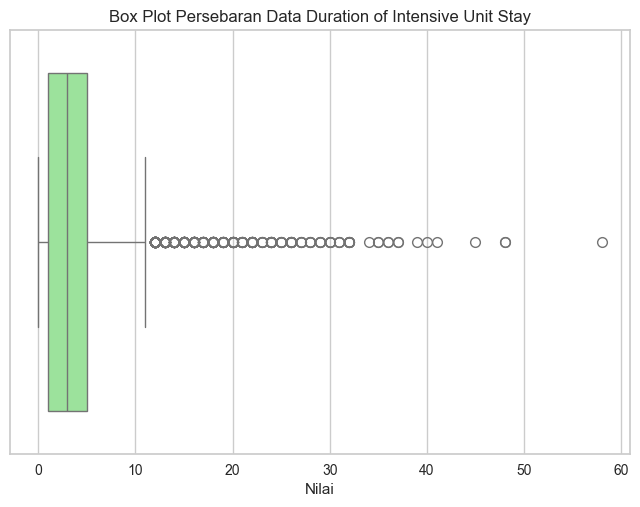

In [361]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_clustering['duration of intensive unit stay'], color='lightgreen')
plt.title('Box Plot Persebaran Data Duration of Intensive Unit Stay')
plt.xlabel('Nilai')
plt.show()

In [362]:
df_clustering = df_clustering[df_clustering['duration of intensive unit stay'] <= 0.50*1e8]

In [363]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)

In [364]:
df_scaled.head()

,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,...,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION,OUTCOME,HB,month,year
0,0.556604,0.0,0.0,0.0,0.105263,0.068966,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.336170,0.818182,0.0
1,0.405660,1.0,0.0,0.0,0.070175,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.510638,0.090909,1.0
2,0.518868,1.0,0.0,1.0,0.017544,0.017241,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.455319,0.727273,0.0
3,0.547170,1.0,1.0,1.0,0.140351,0.086207,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.438298,0.181818,1.0
4,0.481132,0.0,0.0,1.0,0.070175,0.051724,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.374468,0.545455,0.0


In [365]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   AGE                              12551 non-null  float64
 1   GENDER                           12551 non-null  float64
 2   RURAL                            12551 non-null  float64
 3   TYPE OF ADMISSION-EMERGENCY/OPD  12551 non-null  float64
 4   DURATION OF STAY                 12551 non-null  float64
 5   duration of intensive unit stay  12551 non-null  float64
 6   SMOKING                          12551 non-null  float64
 7   ALCOHOL                          12551 non-null  float64
 8   DM                               12551 non-null  float64
 9   HTN                              12551 non-null  float64
 10  CAD                              12551 non-null  float64
 11  PRIOR CMP                        12551 non-null  float64
 12  CKD               

### Cluster based on current OUTCOME, duration of intensive unit stay, GLUCOSE

In [366]:
X = df_scaled[['OUTCOME', 'duration of intensive unit stay', 'GLUCOSE']]

In [367]:
X.head()

,OUTCOME,duration of intensive unit stay,GLUCOSE
0,0.5,0.068966,0.145241
1,0.5,0.000000,0.111412
2,0.5,0.017241,0.123816
3,0.5,0.086207,0.216283
4,0.5,0.051724,0.122688


### K-Means Clustering

For n_clusters = 2 The average silhouette_coefficient is : 0.7095441406018378
For n_clusters = 3 The average silhouette_coefficient is : 0.761171030991885
For n_clusters = 4 The average silhouette_coefficient is : 0.5573447705840525
For n_clusters = 5 The average silhouette_coefficient is : 0.5063175499943765


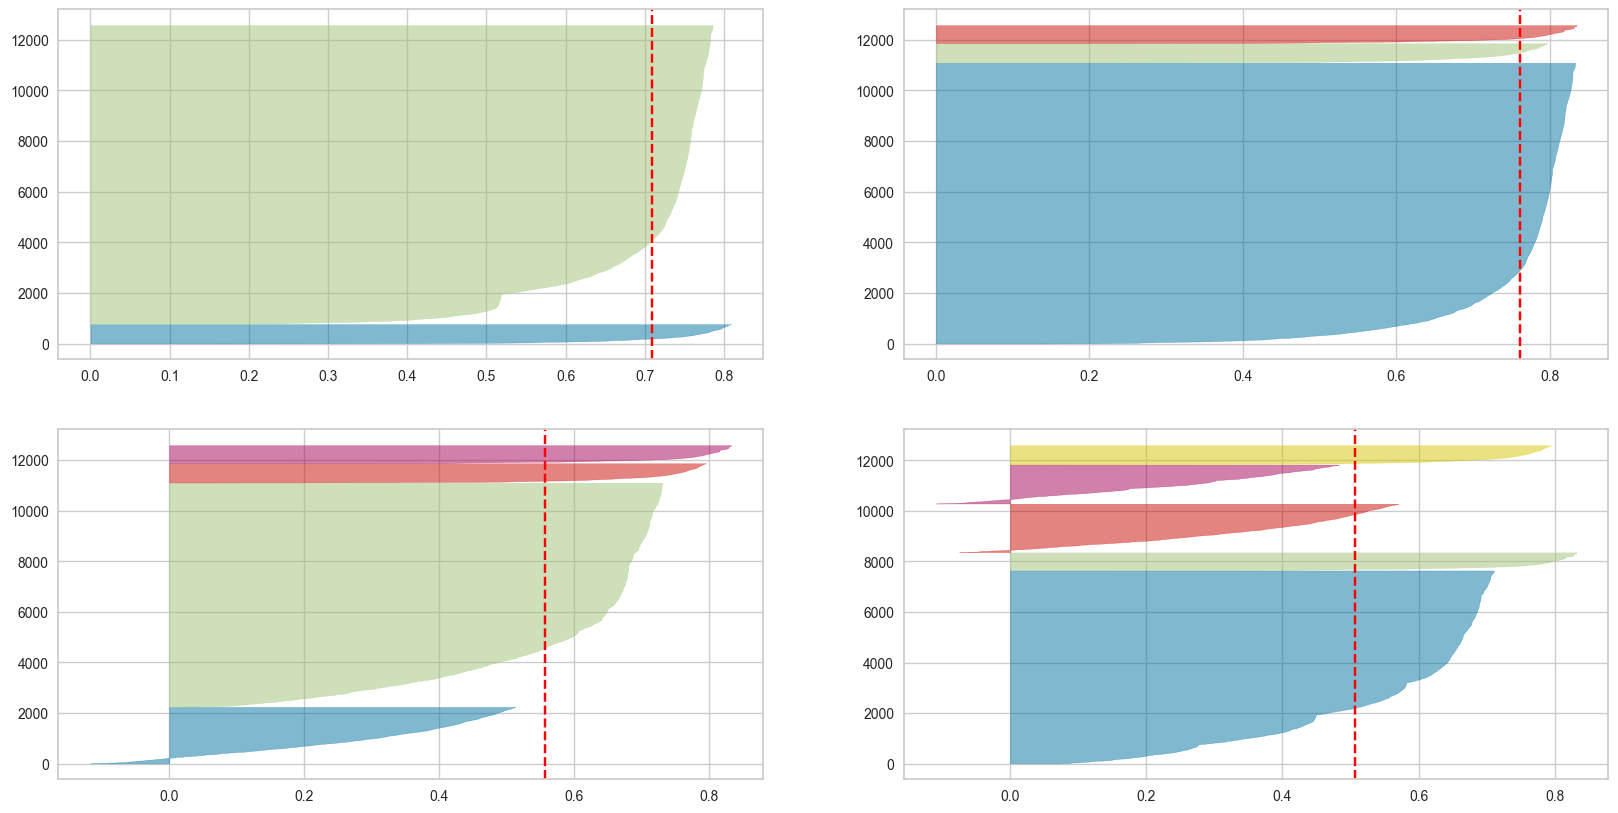

In [368]:
num_of_cluster = [2, 3, 4, 5]

fig, ax = plt.subplots(2, 2, figsize=(20,10))
for k in num_of_cluster:
    # Create KMeans instance for different number of clusters
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Draw silhouette diagram
    q, mod = divmod(k, 2)
    visualizer = SilhouetteVisualizer(clusterer, colors = 'yellowbrick', ax = ax[q-1][mod])
    visualizer.fit(X)

    # Compute silhoutte score
    # This gives a perspective into the density and separation of the formed clusters
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        k,
        "The average silhouette_coefficient is :",
        silhouette_avg,
    )

Berdasarkan silhoutte score yang dihasilkan, n_cluster = 3 memberikan score tertinggi  yang menandakan pilihan jumlah kluster yang paling optimal (karena semakin tinggi berarti lebih terdefinisi dengan baik clusternya).

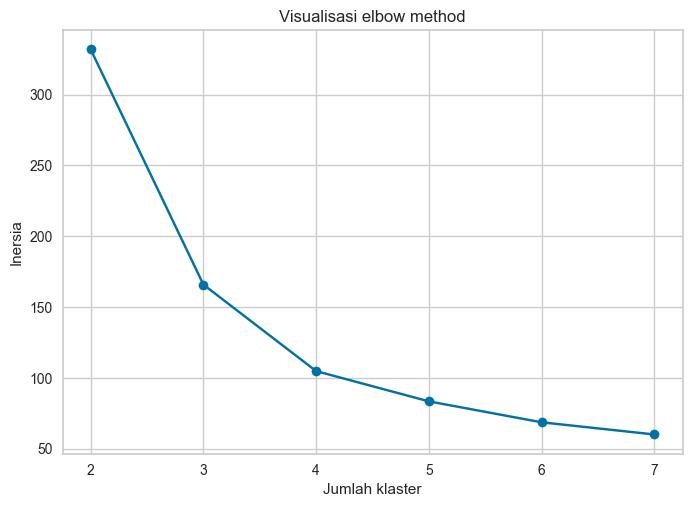

In [369]:
# Visualisasi inertia (sum of squared distances) dengan elbow method
inertia = []
for cluster in range(2, 8):
    km = KMeans(n_clusters=cluster)
    km = km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2, 8), inertia, 'bo-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

Hal tersebut juga didukung oleh visualisasi elbow method di mana letak "siku" terdapat di jumlah klaster 3.

### Model dan Cluster

In [370]:
kmeans = KMeans(n_clusters=3)

cluster_assignment = kmeans.fit_predict(X)
data_with_clusters = pd.DataFrame(X.copy(), columns=('OUTCOME', 'duration of intensive unit stay', 'GLUCOSE'))
data_with_clusters['Clusters'] = cluster_assignment
data_with_clusters

,OUTCOME,duration of intensive unit stay,GLUCOSE,Clusters
0,0.5,0.068966,0.145241,0
1,0.5,0.000000,0.111412,0
2,0.5,0.017241,0.123816,0
3,0.5,0.086207,0.216283,0
4,0.5,0.051724,0.122688,0
...,...,...,...,...
12546,0.5,0.120690,0.211773,0
12547,0.5,0.137931,0.123816,0
12548,1.0,0.206897,0.138475,1
12549,0.5,0.000000,0.088859,0


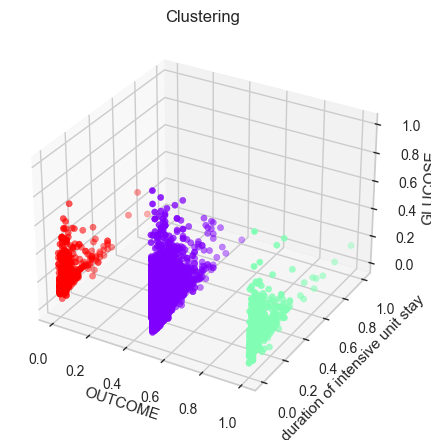

In [371]:
fig = plt.figure(figsize = (5,5))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = data_with_clusters['OUTCOME']
y = data_with_clusters['duration of intensive unit stay']
z = data_with_clusters['GLUCOSE']
cluster = data_with_clusters['Clusters']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Clustering")
plt.grid(False)
ax.set_xlabel('OUTCOME')
ax.set_ylabel('duration of intensive unit stay')
ax.set_zlabel('GLUCOSE')

plt.show()